<img align="center" style="padding-right:10px;" src="Figuras/IP-01-fig_01.png">

# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.

__Exercício 1: Gerando o DataFrame__

* No link do [Faker](https://faker.readthedocs.io/en/master/#) está disponível a documentação deste pacote que permite gerar dados falsos. Para instalação do pacote basta fazer um

In [183]:
from faker import Faker
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fk = Faker("pt-BR")

In [184]:
n = 1000

In [185]:
import random

listaCPF = []
listaNome = []
listaEmail = []
listaSexo = []
listaIdade = []
listaNotasEnem = []
listaAbandono = []
listaSemestreAbandono = []
listaCRA2Semestre = []
listaCRA4Semestre = []
listaCRA6Semestre = []

for i in range(n):
    listaCPF.append(fk.cpf())

    listaEmail.append(fk.email())

    listaSexo.append(random.choice(["masculino","feminino"]))

    if listaSexo[i] == "masculino":
        listaNome.append(fk.name_male())
    else:
        listaNome.append(fk.name_female())

    listaIdade.append(random.randint(18,29))

    listaNotasEnem.append(random.uniform(640,800))

    listaAbandono.append(random.choice([True,False]))

    if listaAbandono[i]:
        listaSemestreAbandono.append(random.randint(1,9))
    else:
        listaSemestreAbandono.append(np.nan)

    if listaAbandono[i] or listaSemestreAbandono[i]<7:
        if listaSemestreAbandono[i] < 6:
            listaCRA6Semestre.append(np.nan)
        else:
            listaCRA6Semestre.append(random.uniform(5,10))
        if listaSemestreAbandono[i]<5:
            listaCRA4Semestre.append(np.nan)
        else:
            listaCRA4Semestre.append(random.uniform(5,10))
        if listaSemestreAbandono[i]<3:
            listaCRA2Semestre.append(np.nan)
        else:
            listaCRA2Semestre.append(random.uniform(5,10))
        

    else:
        listaCRA2Semestre.append(random.uniform(5,10))
        listaCRA4Semestre.append(random.uniform(5,10))
        listaCRA6Semestre.append(random.uniform(5,10))

    


df = pd.DataFrame({"nome":listaNome,
                    "cpf":listaCPF,
                    "email":listaEmail,
                    "sexo":listaSexo,
                    "idade":listaIdade,
                    "nota ENEM":listaNotasEnem,
                    "Abandono":listaAbandono,
                    "semestre do abandono":listaSemestreAbandono,
                    "CRA 2o semestre": listaCRA2Semestre,
                    "CRA 4o semestre": listaCRA4Semestre,
                    "CRA 6o semestre": listaCRA6Semestre})

df
    


,nome,cpf,email,sexo,idade,nota ENEM,Abandono,semestre do abandono,CRA 2o semestre,CRA 4o semestre,CRA 6o semestre
0,Sra. Vitória Ferreira,076.548.312-26,santosclarice@example.org,feminino,20,685.831589,False,NaN,9.847709,6.806604,7.286671
1,Pedro Miguel da Mata,952.834.067-92,nataliacarvalho@example.org,masculino,18,797.658360,False,NaN,9.287113,5.483297,6.233541
2,Daniel da Luz,952.107.384-50,lfarias@example.org,masculino,24,685.793181,False,NaN,9.534929,6.803635,7.959911
3,Maria Fernanda Freitas,531.624.870-80,azevedopedro-miguel@example.net,feminino,23,723.894985,False,NaN,8.748321,8.783595,7.363392
4,Vicente Monteiro,703.586.421-08,qmendes@example.com,masculino,22,703.535547,True,3.0,6.459760,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,Ana Julia Sales,528.471.960-30,isaac84@example.org,feminino,18,774.245111,True,3.0,9.359201,NaN,NaN
996,Beatriz Farias,743.106.529-99,claricemonteiro@example.org,feminino,27,644.465618,False,NaN,6.111841,6.116513,5.855334
997,Marina Moreira,302.169.458-60,caue96@example.org,feminino,26,733.252364,True,8.0,6.483246,7.899496,8.155946
998,Alexia da Rocha,128.350.749-88,alicia15@example.org,feminino,25,672.988611,False,NaN,7.414992,9.572940,6.860735


In [186]:
#df.to_csv("/home/gabriel-dos-sousa/Área de trabalho/Python_Basico/Gabriel/P010/listaFakerP010.csv",index=False)

Desta forma fica disponível o script ``faker`` e o módulo para geração de dados falsos.

Utilizando este módulo, fere um data frame contendo as seguintes colunas

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)

Com o DataFrame criado, guarde os dados num arquivo ``csv``e envie para um colega.

Carregue os dados gerados pelo seu colega do arquivo ``csv`` e, com os dados do DataFrame

1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.
2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.
3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.
4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.   

In [187]:
df = pd.read_csv("./DadosAluno.csv")
df.head()

,CPF,Nome,Idade,Sexo,Email,Nota do enem,Abandono,Semestre em que abandonou,CRA no segundo semestre,CRA no quarto semestre,CRA no sexto semestre
0,069.458.731-10,Emanuel Almeida,20,M,lrodrigues@example.org,671,False,NaN,7.464430,7.600822,9.320826
1,320.659.148-15,Gustavo Henrique Martins,28,M,jalmeida@example.net,698,False,NaN,6.757025,6.330755,7.846825
2,918.204.573-97,Lorenzo Rocha,20,M,vitor75@example.net,708,True,6.0,5.935954,9.687424,NaN
3,518.403.297-50,Luiz Felipe da Rocha,26,M,clarice80@example.org,782,True,4.0,8.694965,NaN,NaN
4,605.748.193-39,Vinicius Campos,26,M,isabelly97@example.org,701,True,6.0,7.503748,8.223091,NaN


Sexo
M    511
F    489
Name: count, dtype: int64


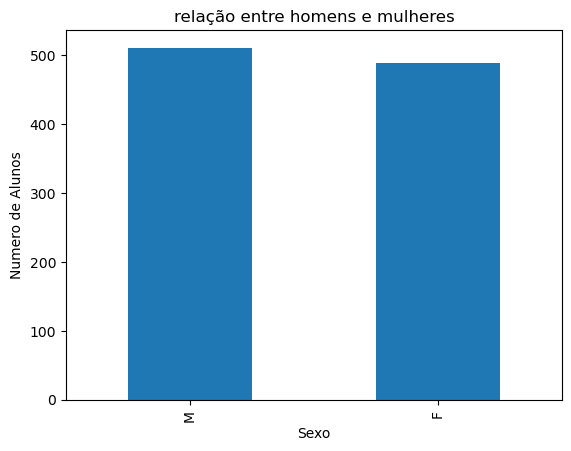

In [188]:
relacaoSexo = df["Sexo"].value_counts()
print(relacaoSexo)
relacaoSexo.plot(kind="bar",title="relação entre homens e mulheres",ylabel="Numero de Alunos");

Nota do ENEM media dos alunos por idade
Idade
18    715.833333
19    716.486239
20    722.182927
21    721.280000
22    720.978022
23    722.656863
24    722.577778
25    724.658537
26    724.717647
27    717.469388
28    721.500000
Name: Nota do enem, dtype: float64


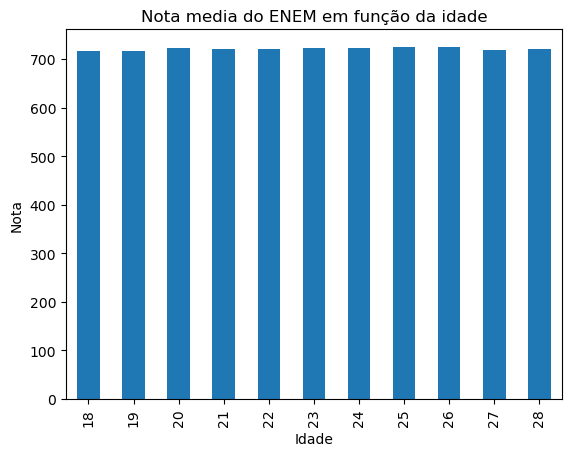

In [189]:
print("Nota do ENEM media dos alunos por idade")
notaMedia = df.groupby("Idade")["Nota do enem"].mean()
print(notaMedia)
notaMedia.plot(kind="bar",title="Nota media do ENEM em função da idade",ylabel="Nota");

In [190]:
df["Nota do enem"] = 5*(df["Nota do enem"]-640)/(800-640)+5

df.rename(columns={"Nota do enem":"Nota do ENEM normalizada"},inplace=True)

In [191]:
df

,CPF,Nome,Idade,Sexo,Email,Nota do ENEM normalizada,Abandono,Semestre em que abandonou,CRA no segundo semestre,CRA no quarto semestre,CRA no sexto semestre
0,069.458.731-10,Emanuel Almeida,20,M,lrodrigues@example.org,5.96875,False,NaN,7.464430,7.600822,9.320826
1,320.659.148-15,Gustavo Henrique Martins,28,M,jalmeida@example.net,6.81250,False,NaN,6.757025,6.330755,7.846825
2,918.204.573-97,Lorenzo Rocha,20,M,vitor75@example.net,7.12500,True,6.0,5.935954,9.687424,NaN
3,518.403.297-50,Luiz Felipe da Rocha,26,M,clarice80@example.org,9.43750,True,4.0,8.694965,NaN,NaN
4,605.748.193-39,Vinicius Campos,26,M,isabelly97@example.org,6.90625,True,6.0,7.503748,8.223091,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,048.213.695-24,Dr. Alexandre Santos,25,M,ipereira@example.com,7.65625,False,NaN,8.882424,8.703509,7.825799
996,540.361.782-53,Caio Cardoso,28,M,sabrinaaragao@example.net,5.87500,False,NaN,5.100496,5.592568,7.112844
997,467.590.128-01,Isabel Souza,26,F,rauloliveira@example.net,5.75000,False,NaN,5.423251,9.841956,9.933170
998,561.287.930-02,Yago Silva,22,M,piresraul@example.org,8.68750,True,4.0,7.170641,NaN,NaN


In [192]:
maiorCRA = df.nlargest(10,"CRA no sexto semestre")
maiorCRA



,CPF,Nome,Idade,Sexo,Email,Nota do ENEM normalizada,Abandono,Semestre em que abandonou,CRA no segundo semestre,CRA no quarto semestre,CRA no sexto semestre
206,263.718.495-73,João Pedro Costa,25,M,mdias@example.org,8.15625,False,NaN,8.160439,7.318403,9.987086
597,641.207.938-69,Heloísa da Mata,21,F,lavinia94@example.com,8.37500,False,NaN,8.316592,9.630801,9.985921
863,057.342.691-07,Bruno Fogaça,20,M,ana-claracosta@example.org,6.18750,False,NaN,5.712277,8.090407,9.970155
744,432.159.087-60,Kevin Ramos,19,M,yasmin36@example.org,6.40625,False,NaN,8.232342,8.529883,9.963977
302,930.285.647-00,Bernardo Novaes,18,M,jmoura@example.org,5.84375,False,NaN,8.197980,9.056226,9.958080
96,283.765.401-90,Sr. Guilherme Silva,25,M,zazevedo@example.org,9.28125,False,NaN,8.064313,5.954997,9.951683
873,506.342.798-74,Maria Eduarda Moura,19,F,ramosarthur@example.org,5.93750,False,NaN,8.184281,7.672252,9.944747
306,023.164.879-04,Giovanna da Cruz,24,F,lucas-gabrielda-rocha@example.net,6.50000,True,8.0,9.749495,5.235866,9.943488
112,037.152.689-21,Dra. Isabella Lopes,24,F,henrique84@example.com,5.56250,True,8.0,9.817967,9.592378,9.941899
657,172.548.390-41,Lavínia Carvalho,26,F,cardosocamila@example.net,5.96875,False,NaN,6.474984,9.128584,9.935674


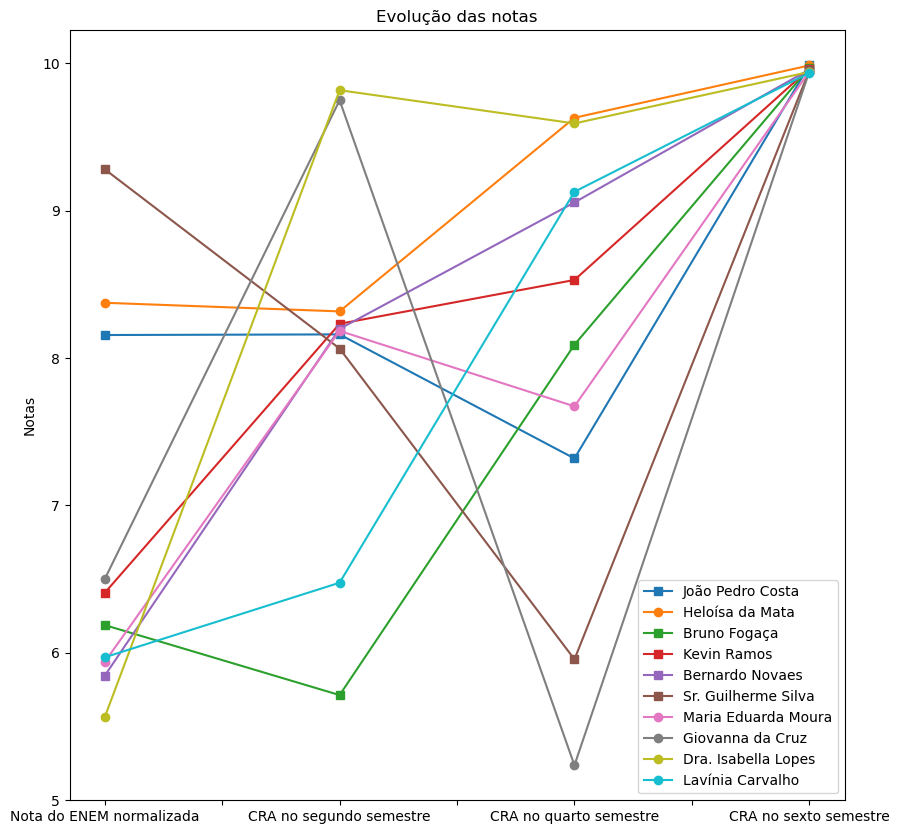

In [193]:
for aluno in maiorCRA.index:
    maiorCRA.loc[aluno,[
        "Nota do ENEM normalizada",
        "CRA no segundo semestre",
        "CRA no quarto semestre",
        "CRA no sexto semestre"]].plot(
            figsize=(10,10),
            title="Evolução das notas",
            ylabel="Notas",
            marker="s" if maiorCRA.loc[aluno,"Sexo"] == "M" else "o");


plt.legend(maiorCRA["Nome"]);